# Para refrescar la memoria


[What Is Statistics: Crash Course Statistics #1](https://www.youtube.com/watch?v=sxQaBpKfDRk&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=2)

[Mathematical Thinking: Crash Course Statistics #2](https://www.youtube.com/watch?v=tN9Xl1AcSv8&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=3)

[Regression: Crash Course Statistics #32](https://www.youtube.com/watch?v=WWqE7YHR4Jc&t=517s)

[Supervised Machine Learning: Crash Course Statistics #36](https://www.youtube.com/watch?v=jmLid2x9eKg&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=37)

# Introduccion a ML

In [ ]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(16,6)})

# Aproximacion de f

In [ ]:
def foo_regresion(X,Y):
    sns.set(rc={'figure.figsize':(16,6)})

    # ### Regresion lineal
    regresion = linear_model.LinearRegression()

    # Entrenamiento
    regresion.fit(X,Y)

    # Predicciones
    Y_hat = regresion.predict(X)

    # Error
    error = np.sqrt(np.square(np.subtract(Y_hat,Y)))
    df = pd.DataFrame(data={'Y_hat':Y_hat, 'Y':Y})

    # ## Plots
    X_plot = np.linspace(Y.min(), Y.max(), 100)
    Y_plot = X_plot
    g = sns.FacetGrid(df, size = 6)
    g = g.map(plt.scatter, "Y", "Y_hat", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()


    print(f'RMSE de prediccion {np.abs(error).mean()}')
    #print(f'Los coeficientes de la regresion: {regresion.coef_}')
    #print(f'Intercepto: {regresion.intercept_}')

## Modelo correcto

$y = x_1 - 3x_2 + 4x_3$

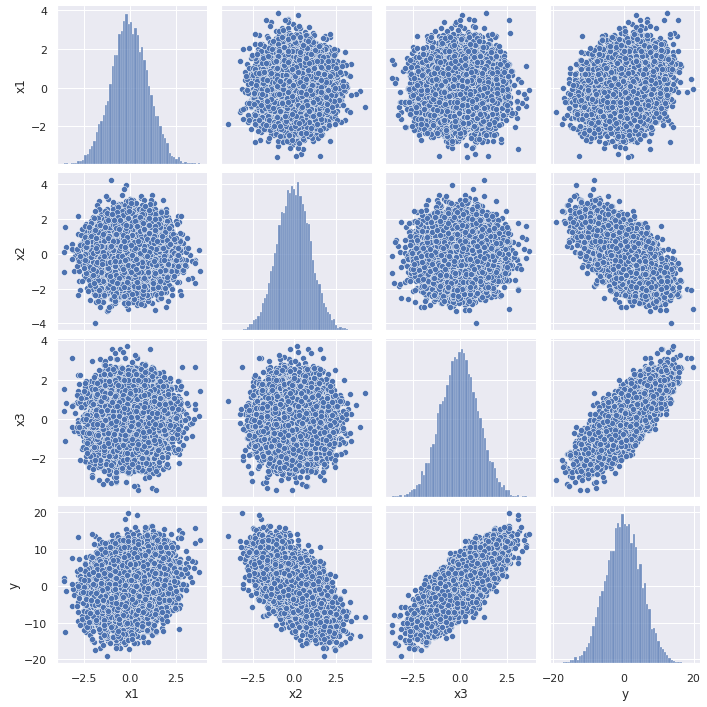

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

sns.pairplot(df)

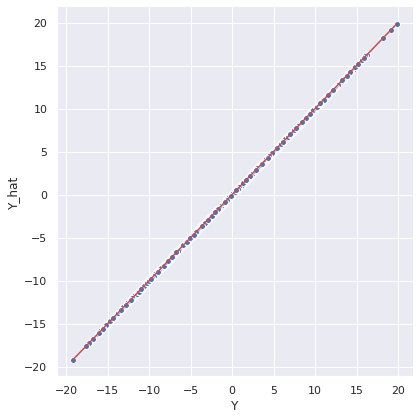

RMSE de prediccion 3.2466055865031876e-15


In [ ]:
foo_regresion(X,Y)

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

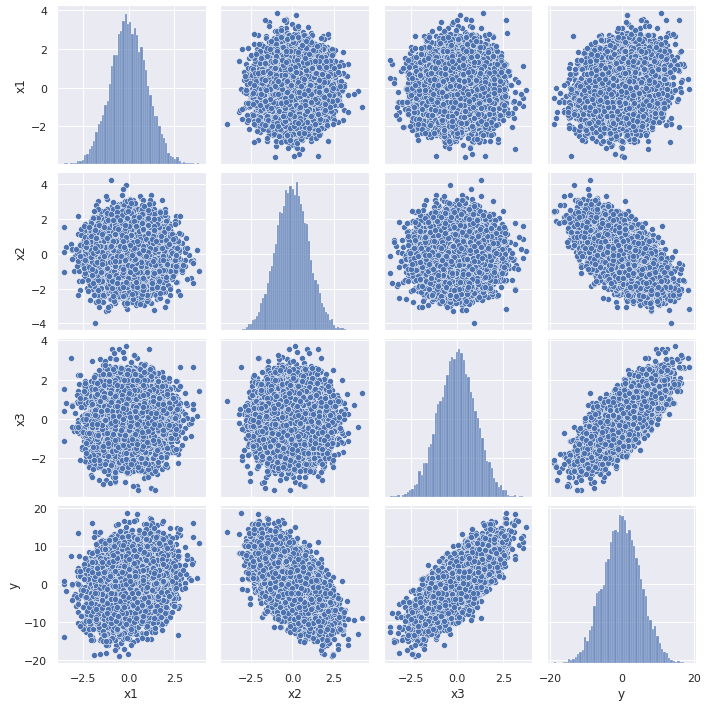

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,1, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

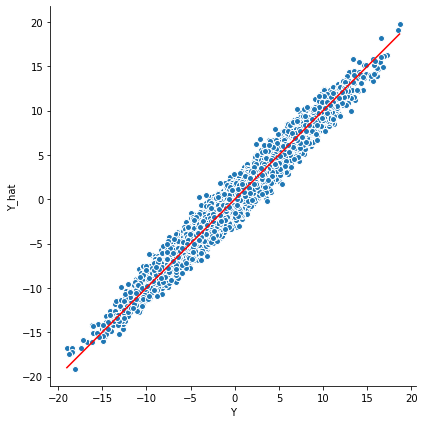

RMSE de prediccion 0.7947282459365101
Los coeficientes de la regresion: [ 0.99121978 -2.99059584  3.98941234]
Intercepto: -0.009854484630884505


In [ ]:
foo_regresion(X,Y)

## Ingenieria de Variables

y = $ \frac{1}{x} + \epsilon$

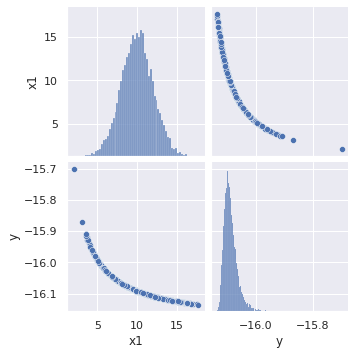

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
eps = np.random.normal(0,10)
# Simulacion de Y
Y = 1/X + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

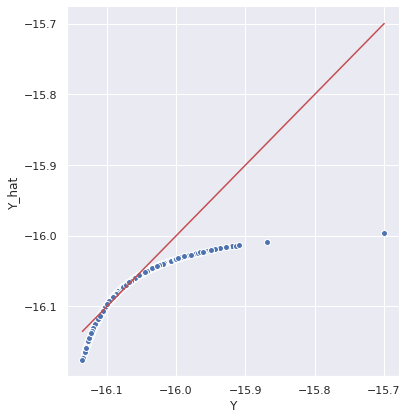

RMSE de prediccion 0.004877889744706031


In [ ]:
foo_regresion(X,Y)

1.5
1.3333333333333333


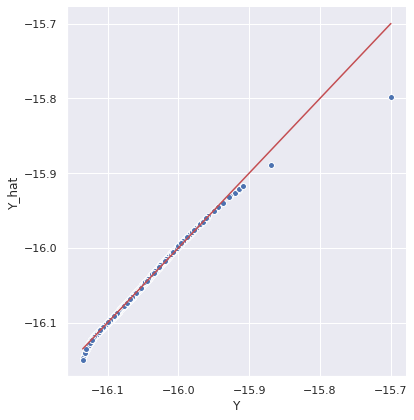

RMSE de prediccion 0.0005265643777608357


In [ ]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
for n in range(2,4):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(1+1/n)
foo_regresion(X2,Y)

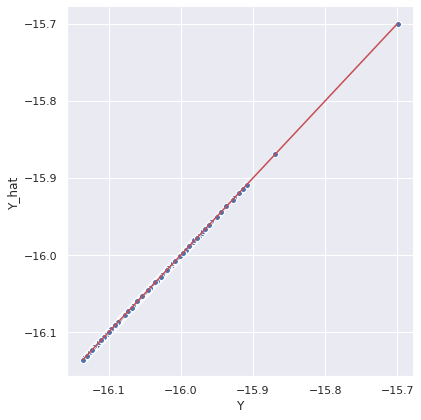

RMSE de prediccion 2.5757174171303633e-17


In [ ]:
X3 = X.copy()

# ## Feature Eng
X3 = 1/X3
foo_regresion(X3,Y)

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

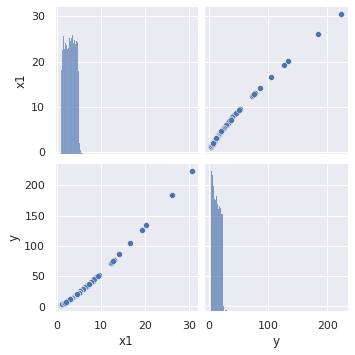

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

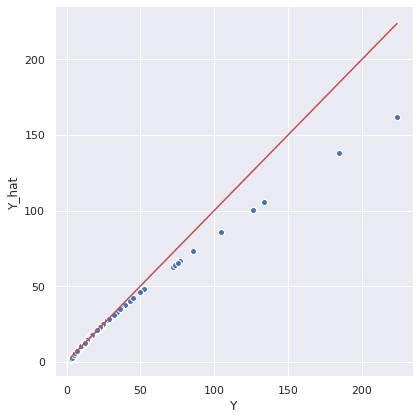

RMSE de prediccion 0.4395214198657493


In [ ]:
foo_regresion(X,Y)

1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5


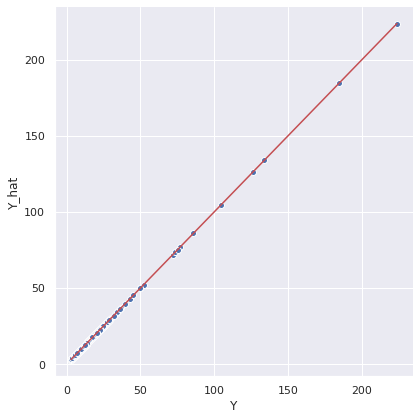

RMSE de prediccion 0.00010348002101566754


In [ ]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
    print(p)
foo_regresion(X2,Y)

$ y = sin(x) $

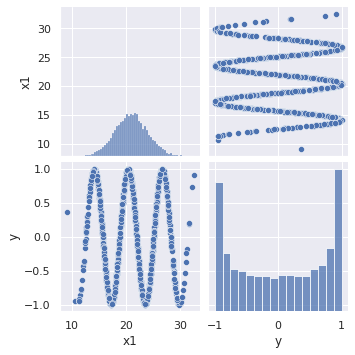

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

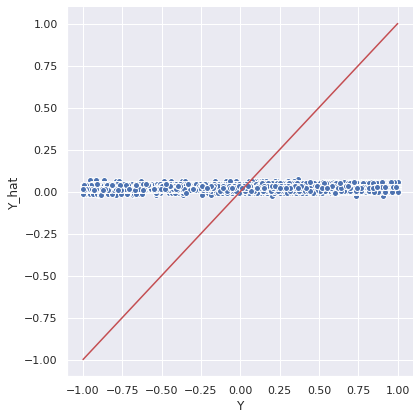

RMSE de prediccion 0.6331487868228455


In [ ]:
foo_regresion(X,Y)

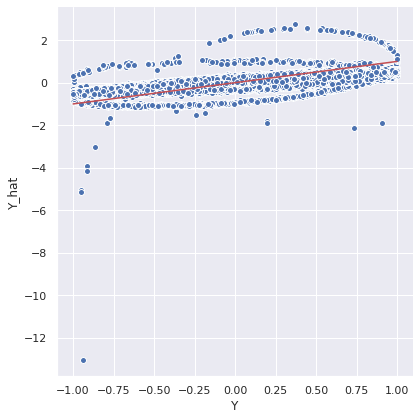

RMSE de prediccion 0.36712847282639355


In [ ]:
X2 = X.copy()
power = [1 + 1/n for n in range(1,1000)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

## Limites de Modelaje

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

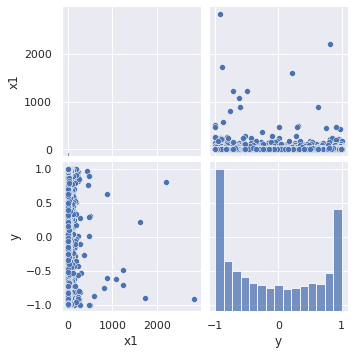

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))

# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

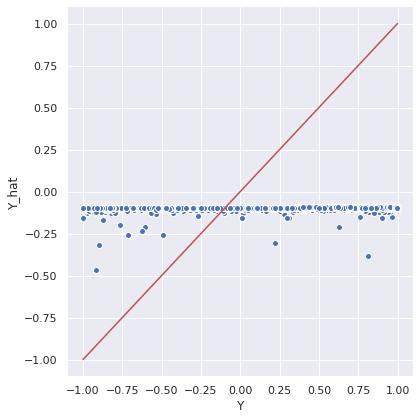

RMSE de prediccion 0.6572884811970667


In [ ]:
foo_regresion(X,Y)

[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9]


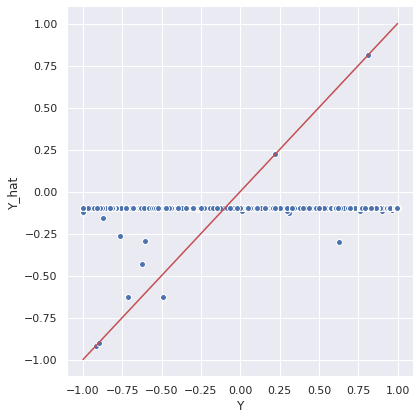

RMSE de prediccion 0.6569372323920666


In [ ]:
X2 = X.copy()
power = [1 + n/10 for n in range(1,100)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

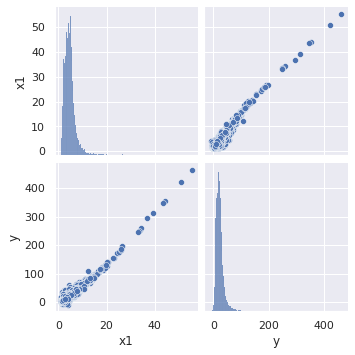

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]]
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

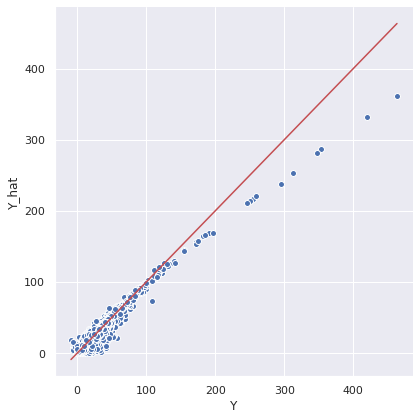

RMSE de prediccion 3.363706684030585


In [ ]:
foo_regresion(X,Y)

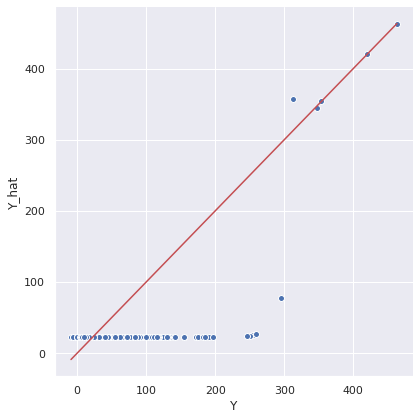

RMSE de prediccion 10.081052254664051


In [ ]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [1 + n/2 for n in range(1,100)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

$y = x_1 + \epsilon_1*\epsilon_2$

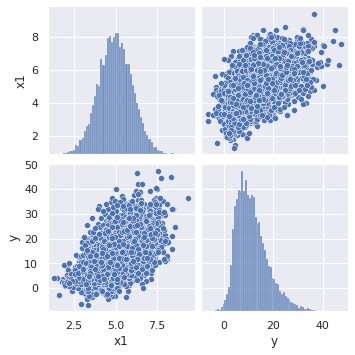

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]]
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

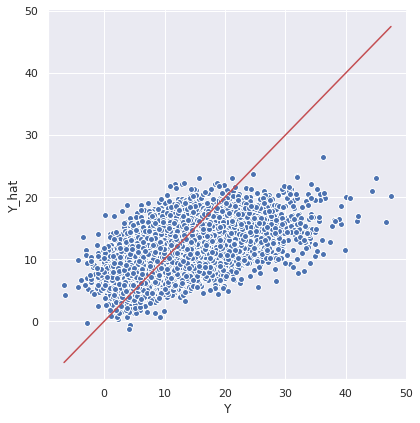

RMSE de prediccion 4.169746507744684


In [ ]:
foo_regresion(X,Y)

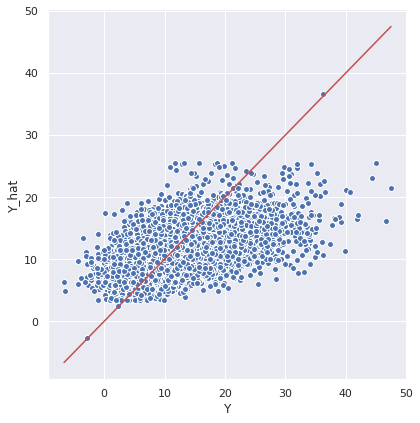

RMSE de prediccion 4.1612359319068695


In [ ]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

# Train y Test

Ahora, separemos nuestros datos en train y test. Como estamos en el mundo **i.i.d** y no series de tiempo o panel. Podemos elegir el train y test de manera completamente aleatoria.

In [ ]:
from sklearn.model_selection import train_test_split

def test_regresion(X,Y):

    # Train y Test
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


    # ### Regresion lineal
    regresion = linear_model.LinearRegression()
    # Entrenamiento
    regresion.fit(X_train,Y_train)
    # Predicciones
    Y_hat = regresion.predict(X_test)
    Y_hat_train = regresion.predict(X_train)
    # Error
    error_test = np.sqrt(np.square(np.subtract(Y_hat,Y_test)))
    error_train = np.sqrt(np.square(np.subtract(Y_hat_train,Y_train)))
    df = pd.DataFrame(data={'Y_hat':Y_hat, 'Y':Y_test})

    # ## Plots
    X_plot = np.linspace(Y_test.min(), Y_test.max(), 100)
    Y_plot = X_plot
    g = sns.FacetGrid(df, size = 6)
    g = g.map(plt.scatter, "Y", "Y_hat", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()

    print(f'Train RMSE de prediccion {error_test.mean()}')
    print(f'Test RMSE de prediccion {error_train.mean()}')
    print(f'Los coeficientes de la regresion: {regresion.coef_}')
    print(f'Intercepto: {regresion.intercept_}')

$y = x + 5x^2 + 6x^3 + x^4\epsilon$

> Indented block



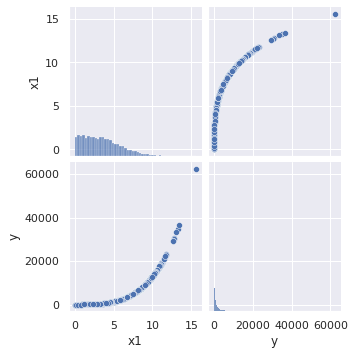

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(58)
N = 10000
# Matriz de Diseño
X = np.random.normal(3,3,size=(N,1))
eps = np.random.normal(3,2)
X = np.abs(X)
# Simulacion de Y
Y = Y = X + 5*np.power(X,2) + 6*np.power(X,3) + np.power(X,4)*eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

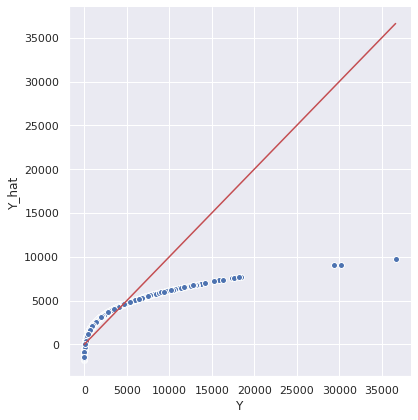

Train RMSE de prediccion 985.1100969154054
Test RMSE de prediccion 975.6455964002057
Los coeficientes de la regresion: [852.56692198]
Intercepto: -1718.6703375742961


In [ ]:
test_regresion(X,Y)

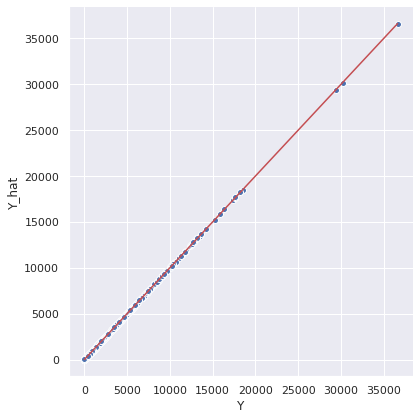

Train RMSE de prediccion 1.3285575405650243e-11
Test RMSE de prediccion 1.2854734323045482e-11
Los coeficientes de la regresion: [1.         5.         6.         0.65243876]
Intercepto: 1.2960299500264227e-11


In [ ]:
X2 = X.copy()

#Ingenieria de Variables
power = [2,3,4]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

test_regresion(X2,Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


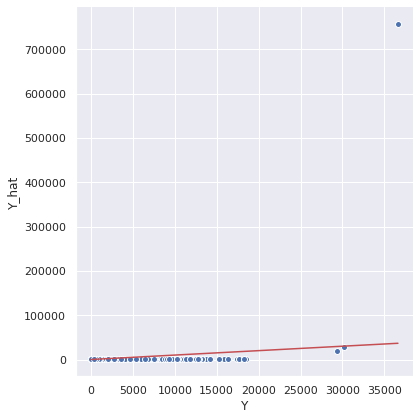

Train RMSE de prediccion 1797.0670365646754
Test RMSE de prediccion 1413.0225157836817
Los coeficientes de la regresion: [ 2.34684130e-100 -3.20652273e-100  2.56489005e-109  6.34644081e-114
  8.12141388e-115  0.00000000e+000 -2.85540472e-194 -2.00859021e-193
 -1.23082947e-192 -4.48096174e-192  4.02049645e-191  1.37903931e-189
  2.54550753e-188  3.97239259e-187  5.74374121e-186  7.96177845e-185
  1.07526781e-183  1.42734272e-182  1.87201873e-181  2.43386071e-180
  3.14366182e-179  4.04003607e-178  5.17140281e-177  6.59846060e-176
  8.39727079e-175  1.06630993e-173  1.35152009e-172  1.71027717e-171
  2.16123521e-170  2.72770230e-169  3.43878212e-168  4.33078978e-167
  5.44900577e-166  6.84984685e-165  8.60355001e-164  1.07974867e-162
  1.35402506e-161  1.69666931e-160  2.12441170e-159  2.65798849e-158
  3.32307502e-157  4.15142818e-156  5.18228291e-155  6.46405580e-154
  8.05641940e-153  1.00328222e-151  1.24835430e-150  1.55193840e-149
  1.92761234e-148  2.39198682e-147  2.96534681e-146

In [ ]:
X3 = X.copy()

#Ingenieria de Variables
power = [n for n in range(1,100)]
print(power)
for p in power:
    X3 = np.concatenate((X3,np.power(X[:,0],p).reshape((N,1))), axis=1)

test_regresion(X3,Y)

# Regularizacion y Validacion

Ahora estudiaremos como funciona la regularizacion, y como se ve la convergencia de los parametros.

Basado en [este codigo](https://colab.research.google.com/github/cvxgrp/cvxpy/blob/master/examples/machine_learning/ridge_regression.ipynb#scrollTo=MHUqiFdmw6-y).

In [ ]:
import cvxpy as cp

In [ ]:
def fun_perdida(X, Y, beta):
    return cp.pnorm(cp.matmul(X, beta) - Y, p=2)**2

def penalizacion(beta):
    return cp.pnorm(beta, p=2)**2

def fun_objetivo(X, Y, beta, lambd):
    return fun_perdida(X, Y, beta) + lambd * penalizacion(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * fun_perdida(X, Y, beta).value

In [ ]:
def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(8939)
    beta_star =  np.random.lognormal(0,1,size=(n,))*5
    X = np.random.normal(10,1,size=(m, n))
    eps = np.random.normal(10,1,size=m)
    Y = X.dot(beta_star) + eps
    return X, Y , beta_star

In [ ]:
def plot_errors(train_errors, val_errors, test_errors, lambd_values):
    sns.lineplot(lambd_values, train_errors, label="Train error")
    sns.lineplot(lambd_values, val_errors, label="Val error")
    sns.lineplot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    lmb_opt = val_errors.index(min(val_errors))
    lmb_opt = lambd_values[lmb_opt]
    test_opt = test_errors.index(min(test_errors))
    test_opt = lambd_values[test_opt]
    plt.axvline(lmb_opt, color='orange')
    plt.axvline(test_opt, color='g')
    plt.show()

In [ ]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        sns.lineplot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()


Modelo real:  
$y = X\beta + \epsilon$  
$\beta \in \mathcal{R}^n$  
 $X \in \mathcal{R}^{m \times n}$
  
Modelo $\hat{f}$ propuesto:  
$\hat{f} = X\beta + X^2\beta^I +  
X^{\frac{1}{2}}\beta^{II} + \epsilon$

En este caso agregamos transformaciones de variables cubicas y raices a nuestro modelo. Aunque, originalemnte no existian.

In [ ]:
m = 200
n = 5
noise = 3
sigma = 5


X, Y, real_beta = generate_data(m, n, sigma)

# Creacion de Ruido
n_ = n
# X_noise = np.random.normal(1,5, size=(m,noise))
# X = np.concatenate((X, X_noise), axis=1)
#real_beta = np.concatenate((real_beta, np.zeros(noise)))
# n = n +noise
# ### Transformaciones cubicas y raiz.
for x in range(0,n):
    X = np.concatenate((X,np.power(X[:,x],3).reshape((m,1))), axis=1)
for x in range(0,n):
    X = np.concatenate((X,np.power(X[:,x],.5).reshape((m,1))), axis=1)

real_beta = np.concatenate((real_beta, np.zeros( X.shape[1]-n)))
n = X.shape[1]


# df = pd.DataFrame(X_t[:,0:n_])
# df['y'] = Y_t
# sns.pairplot(df)

Plateemos el problema de optimizacion:

In [ ]:
# Split Test Train
X_t, X_test, Y_t, Y_test = train_test_split(
X, Y, test_size=0.2, random_state=48)
# Split Train Validation
X_train, X_val, Y_train, Y_val = train_test_split(
X_t, Y_t, test_size=0.5, random_state=420)

# Numero de betas
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(fun_objetivo(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-10, 1, 100)
train_errors = []
val_errors = []
test_errors = []
beta_values = []
# Resolver regresion lineal para cada lambda
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    val_errors.append(mse(X_val, Y_val, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

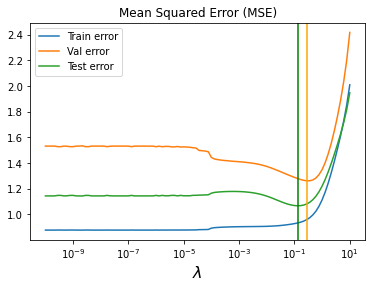

In [ ]:
plot_errors(train_errors, val_errors, test_errors, lambd_values)

Dinamica de las $\beta$ dependiendo del valor de $\lambda$

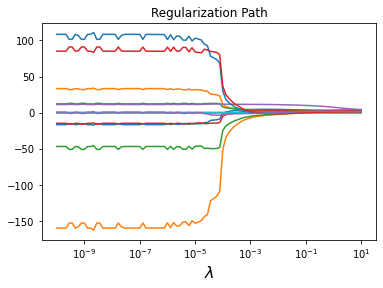

In [ ]:
plot_regularization_path(lambd_values, beta_values)

$\beta^*$ optima vs. $\beta$ real

Lambda Optima: 0.2782559402207126


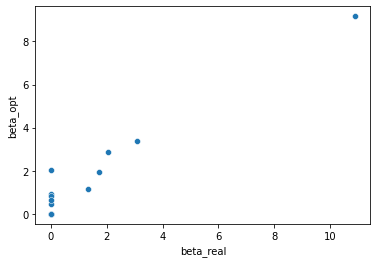

In [ ]:
lmb_opt = val_errors.index(min(val_errors))
print(f'Lambda Optima: {lambd_values[lmb_opt]}')
betas = pd.DataFrame({'beta_real':real_beta,'beta_opt':beta_values[lmb_opt]})
sns.scatterplot(data=betas, y='beta_opt', x='beta_real')

Lambda Optima: 0.12915496650148828


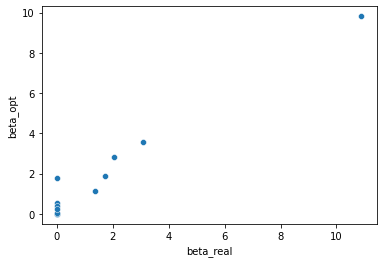

In [ ]:
lmb_opt = test_errors.index(min(test_errors))
print(f'Lambda Optima: {lambd_values[lmb_opt]}')
betas = pd.DataFrame({'beta_real':real_beta,'beta_opt':beta_values[lmb_opt]})
sns.scatterplot(data=betas, y='beta_opt', x='beta_real')